In [1]:
import random_walker as rw
import utils
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
from networkx.drawing.nx_agraph import write_dot, graphviz_layout

In [2]:
H,root,G=rw.make_tree(2.,15,0.2,0.2)

In [3]:
a,b=utils.block_indeces(G,G.target_node)

In [48]:
nodes=list(G.nodes())
alpha=[nodes.index(x) for x in a]
beta=[nodes.index(x) for x in b]
print(len(a),len(b))
print(a.index(G.root),a.index(G.target_node))

110 15
0 58


/home/k1801311/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/k1801311/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
/home/k1801311/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):
/home/k1801311/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.it

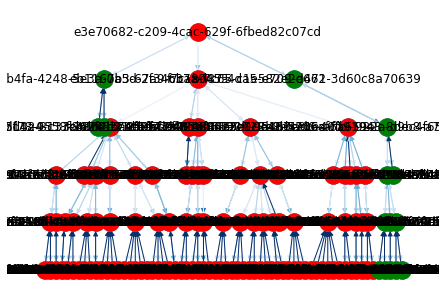

In [5]:
pos=graphviz_layout(H,prog='dot')
(edges,weights) = zip(*nx.get_edge_attributes(G,'weight').items())
nx.draw(G, pos, edgelist=edges, edge_color=weights, width=1.0, edge_cmap=plt.cm.Blues)
nx.draw_networkx_nodes(G,pos,nodelist=a,node_color='r')
nx.draw_networkx_nodes(G,pos,nodelist=b,node_color='g')
nx.draw_networkx_labels(G,pos)
plt.show()

In [6]:
W=nx.to_numpy_matrix(G,nodelist=a+b,weight='weight')
Walpha=W[:len(a)][:,:len(a)]
Wbeta=W[:-len(b)][:,:-len(b)]
Wab=W[:len(alpha)][:,:-len(b)]
Wba=W[:-len(b)][:,:len(a)]
u=np.eye(len(G)-1)-W[1:,1:]
Delta = -W[0,1:]

In [7]:
pi=np.concatenate(([[1]],-np.matmul(Delta,np.linalg.inv(u)).T))

In [8]:
pi=pi/np.sum(pi)

In [9]:
np.matmul(pi.T, np.eye(len(G))-W )

matrix([[ 1.02578434e-17,  5.42101086e-18,  4.31139306e-18,
         -4.33680869e-18,  1.37453150e-19, -4.33680869e-19,
         -4.66590399e-19, -1.47844884e-18, -5.28843783e-19,
          1.73472348e-18,  6.73102103e-19,  2.56751770e-19,
          6.64471716e-19,  5.06804419e-19,  5.73420640e-19,
          3.73102919e-19, -2.14932096e-18,  3.14727227e-19,
          0.00000000e+00, -2.71584080e-19, -1.92034322e-18,
         -7.29497424e-19,  1.36360784e-18, -1.92034322e-18,
         -1.62630326e-18, -3.46944695e-18, -1.59050946e-18,
          6.60885315e-18,  3.12892593e-18, -3.94485255e-18,
          6.89955508e-19,  0.00000000e+00,  4.08265239e-19,
          0.00000000e+00, -1.30104261e-18, -1.73472348e-18,
          5.67138401e-19,  8.67361738e-19, -2.20518742e-18,
         -2.79741834e-19, -1.06270776e-18, -4.85877118e-19,
          3.46944695e-18,  0.00000000e+00, -2.71067185e-18,
          0.00000000e+00,  0.00000000e+00,  5.31494926e-19,
          6.93889390e-18, -2.87313576e-1

In [32]:
U=np.linalg.inv(np.eye(len(a)-1)-Walpha[1:,1:])
h=np.sum(Walpha[0,:])*U[0,:]
H=np.matmul(np.ones((len(a)-1,1)),h)
delta=-np.sum(Walpha[0,:])*np.sum(np.linalg.matrix_power(U,2)[0,:])
beta=1-np.sum(Walpha[0,:])*np.sum(U[0,:])
F=U-delta/beta*np.eye(len(a)-1)

In [44]:
Q=np.zeros((len(a),len(a)))
Q[0,0]=delta/beta**2
Q[0,1:] = 1/beta*np.matmul(h,U-np.eye(len(a)-1)*delta/beta)
Q[1:,0] = -1/beta*np.matmul( U-np.eye(len(a)-1)*delta/beta**2,np.ones(len(a)-1) )
Q[1:,1:]=U+1/beta*(np.matmul(np.matmul(U,H),U) - np.matmul(np.matmul(F,H),F))

In [55]:
Qdg = np.diag(np.diag(Q))

array([[-2.45954171e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -1.49185090e+04,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -1.64986646e+04, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -4.07619425e+03,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00, -5.92083444e+03,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00, -6.99845109e+03]])

In [56]:
MQ = np.eye(len(a))-Q+np.matmul(np.ones((len(a),len(a))),Qdg)

In [58]:
MQ[0,58]

-111289.6961888185

In [61]:
np.linalg.norm(np.matmul( np.eye(len(a)-1)-Walpha[1:,1:],U ))

10.440306508910549